### Linear Regression ###
- Input/Independent feature = Weight
- Output/Dependent feature = Height

### Steps ###
 - Step 1) - Load the dataset
 - Step 2) - Divide the dataset into dependent and independent variables
 - Step 3) - Train test split
 - Step 4) -  Standardize the data - Standardize both 'x_train' and 'x_test'
 - Step 5) Train the model using Linear Regression algorithm
 - Step 6) Plot the best fit line
 - Step 7) Make Predictions on Test Data
 - Step 8) Calculate the errors = MSE, MAE, RMSE
 - Step 9) Performance metrics - R-Square, Adjusted R-Square
 - Step 10) Predicting the output(Height) of a New Input(Weight = 80) 
    - 10.1) Standardize/Scale the new weight
    - 10.2) Apply Linear Regression
 - Step 11 - Test if the model we built is a good one
    - 11.1) - Model is Good if - Scatter plot between y_test and y_test_predicted is Linear
    - 11.2) - Model is Good if - KDE plot of Residuals is a Normal Distribution
    - 11.3) - Model is Good if - The Scatter plot between 'y_test_predicted' and 'residuals' 

In [72]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from  sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

In [ ]:
# Step 1) - Load the dataset
df = pd.read_csv('./resources/height-weight.csv')


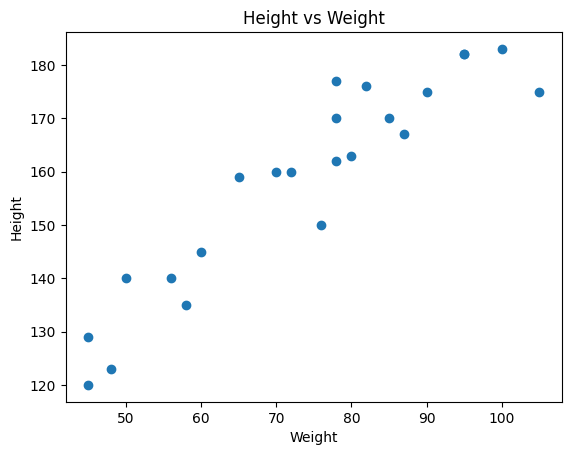

In [5]:
# Plot the Weight(x) vs Height(y) in scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [ ]:
#Step 2) - Divide the dataset into dependent and independent variables
x = df[['Weight']] # independent variable
y = df['Height'] # dependent variable
print('Weight = ',x.head())
print('Height = ',y.head())

Weight =     Weight
0      45
1      58
2      48
3      60
4      70
Height =  0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64


In [35]:
#Step 3) - Train test split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# Total records = 23 rows
# x_train = 18 rows (80% split)
# x_test = 5 rows (20% split)
# y_train = 18 rows (80% split)
# y_test = 5 rows (20% split)
print('x_train shape: ',x_train.shape)
print('x_train',x_train.head())

print('y_train shape: ',y_train.shape)
print('y_train',y_train.head())

print('x_test shape: ',x_test.shape)
print('x_test',x_test.head())

print('y_test shape: ',y_test.shape)
print('y_test',y_test.head())




x_train shape:  (18, 1)
x_train     Weight
12     105
1       58
13     100
5       78
2       48
y_train shape:  (18,)
y_train 12    175
1     135
13    183
5     162
2     123
Name: Height, dtype: int64
x_test shape:  (5, 1)
x_test     Weight
15      78
9       78
0       45
8       95
17      65
y_test shape:  (5,)
y_test 15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64


x_train before scaling/standardization:      Weight
12     105
1       58
13     100
5       78
2       48
x_train after scaling/standardization as DataFrame:       Weight
0  1.736891
1 -0.920270
2  1.454214
3  0.210437
4 -1.485623
x_test before scaling/standardization:      Weight
15      78
9       78
0       45
8       95
17      65
x_test after scaling/standardization as DataFrame:       Weight
0  0.210437
1  0.210437
2 -1.655229
3  1.171538
4 -0.524522


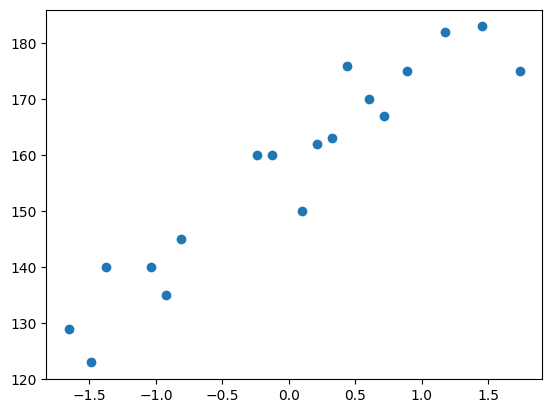

In [ ]:
#Step 4) -  Standardize the data - Standardize both 'x_train' and 'x_test'
# Rule of Thumb : Always fit the scaler on training data only. Then use the same scaler to transform both training and testing data.
# For Training data = We use scalar.fit_transform()
# For Testing data = We use scalar.transform() -  because we want to use the same mean and std-deviation as x_train
# y_train = Does not have tobe standardized/scaled because it is the Actual Output. we will need this to compare to the Predicted Output later.

scaler = StandardScaler()

#4.1) Standardize x_train
x_train_before_standardization =  x_train.copy()
print('x_train before scaling/standardization: ', x_train_before_standardization.head())

# Finds the mean, std-deviation of x_train and then scales/standardizes the data by applying Z-score on every datapoint of x_train. 
# Z-score = (x - mean) / std-deviation
# x_train_after_standardization is now a numpy array with mean=0 and std-deviation=1
x_train_after_standardization = scaler.fit_transform(x_train)
# print('x_train after scaling/standardization: ', x_train_after_standardization[:5])

# Convert x_train_after_standardization back to a DataFrame
x_train_after_standardization = pd.DataFrame(x_train_after_standardization, columns=['Weight'])
print('x_train after scaling/standardization as DataFrame: ', x_train_after_standardization.head())

#4.2) Standardize x_test
x_test_before_standardization =  x_test.copy()
print('x_test before scaling/standardization: ', x_test_before_standardization.head())

# Note: Here we are using scaler.transform() instead of scaler.fit_transform() because we want to use the same mean and std-deviation as x_train
x_test_after_standardization = scaler.transform(x_test)
# print('x_test after scaling/standardization: ', x_test_after_standardization[:5])

# Convert x_test_after_standardization back to a DataFrame
x_test_after_standardization = pd.DataFrame(x_test_after_standardization, columns=['Weight'])
print('x_test after scaling/standardization as DataFrame: ', x_test_after_standardization.head())

# Plot the standardized x_train_after_standardization vs y_train in scatter plot
plt.scatter(x_train_after_standardization, y_train)





In [ ]:
# Step 5) Train the model using Linear Regression algorithm
# Linear Regression Equation: y = mx + c
# where,
# y = predicted output (Height)
# m = coefficient
# x = independent variable (Weight)
# c = intercept
linearRegression = LinearRegression()
linearRegression.fit(x_train_after_standardization, y_train)

# Print the coefficients
print('Coefficient/Slope (m) : ', linearRegression.coef_)
print('Intercept (c) : ', linearRegression.intercept_)


Coefficient (m) :  [17.03440872]
Intercept (c) :  157.5


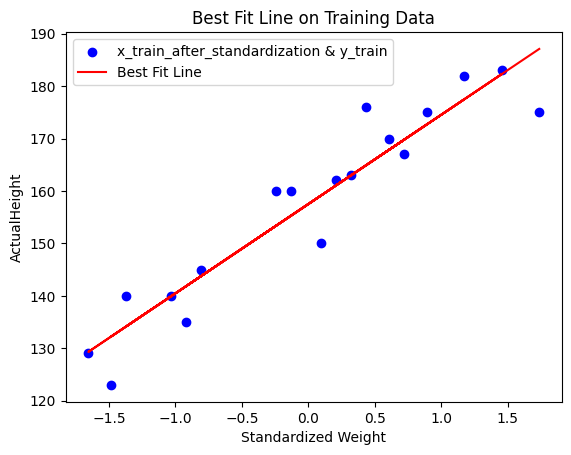

In [ ]:
# Step 6) Plot the best fit line
plt.scatter(x_train_after_standardization, y_train, color='blue', label='x_train_after_standardization & y_train')
y_train_predicted = linearRegression.predict(x_train_after_standardization)
plt.plot(x_train_after_standardization, y_train_predicted, color='red', label='Best Fit Line')
plt.xlabel('Standardized Weight')
plt.ylabel('ActualHeight')
plt.title('Best Fit Line on Training Data')
plt.legend()
plt.show()

In [43]:
# Step 7) Make Predictions on Test Data
# To make this prediction, we will use the equation of line 'y=mx+c'
# m= slope/coefficient = linearRegression.coef_
# c= intercept = linearRegression.intercept_
y_test_predicted = linearRegression.predict(x_test_after_standardization)
print('Predicted Height for x_test_after_standardization: ', y_test_predicted)  

Predicted Height for x_test_after_standardization:  [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [47]:
# Step 8) Calculate the errors = MSE, MAE, RMSE
# y_test = Actual Height
# y_test_predicted = Predicted Height
mse = mean_squared_error(y_test,y_test_predicted);
mae = mean_absolute_error(y_test,y_test_predicted)
rmse = np.sqrt(mse)

print('mse = ',mse);
print('mae = ',mae);
print('rmse = ',rmse);

mse =  109.77592599051664
mae =  9.822657814519232
rmse =  10.477400726827081


In [79]:
# Step 9) Performance metrics - R-Square, Adjusted R-Square
# r_square will always be greater than adjusted_r_square
from sklearn.metrics import r2_score as r2_score_func
r_square = r2_score(y_test, y_test_predicted)
ajusted_r_square = 1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print('r_square = ', r_square)
print('adjusted_r_square = ', ajusted_r_square)

r_square =  0.776986986042344
adjusted_r_square =  0.7026493147231252


In [80]:
# Step 10) Predicting the output(Height) of a New Input(Weight = 80) 
new_x = 80 # New Weight

#10.1) Standardize/Scale the new weight
# We are using scaler.transform() and not scaler.fit_transform() because we want to use the same values of mean, 
# - std-deviation and z-score as the 'x_train_after_standardization' earlier to see if our model is working
x_new_after_standardization = scaler.transform([[new_x]])

print('New data Point  = ',new_x)
print('New data point standardized = ',x_new_after_standardization)

#10.2) Apply Linear Regression
y_new_predicted = linearRegression.predict(x_new_after_standardization)
print('y_new_predicted (Height) for New Data point (Weight)= ',y_new_predicted,new_x)


New data Point  =  80
New data point standardized =  [[0.32350772]]
y_new_predicted (Height) for New Data point (Weight)=  [163.01076266] 80


/Users/ankur/backup/delta/sn/datascience/workspace/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ankur/backup/delta/sn/datascience/workspace/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


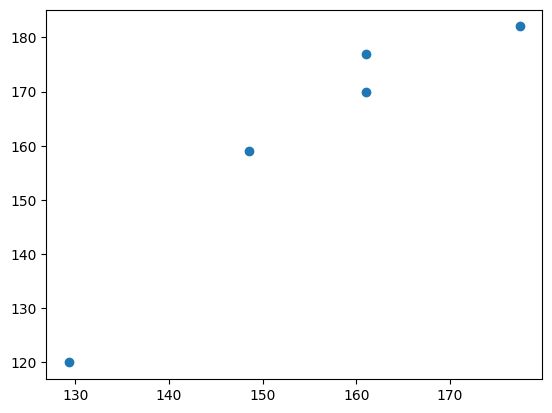

In [ ]:
# Step 11 - Test if the model we built is a good one
# 11.1) - Model is Good if - Scatter plot between y_test and y_test_predicted is Linear
# Output Observation - This graph is Linear, hence the Model is Good
plt.scatter(y_test_predicted, y_test)


15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64 15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64


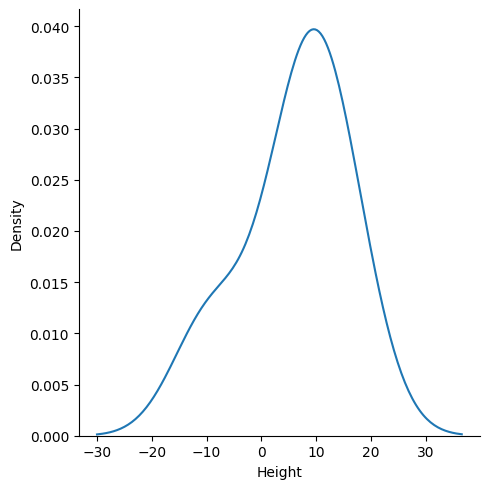

In [81]:
# 11.2) - Model is Good if - KDE plot of Residuals is a Normal Distribution
# - Residual = Error = y_test - y_test_predicted
# - y_test = Actual Height
# - y_test_predicted - Predicted Height
# - Residual is the error, the lesser the better
# Output Observation - This graph is a Normal Distribution Graph, hence the Model is Good
residuals = y_test - y_test_predicted
print(residuals,residuals)
sns.displot(residuals,kind='kde')



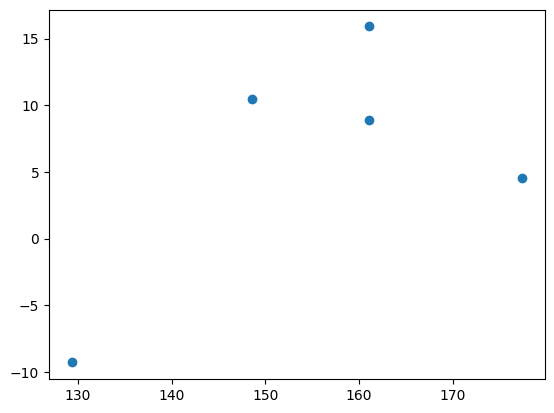

In [ ]:
#11.3) - Model is Good if - The Scatter plot between 'y_test_predicted' and 'residuals' 
# - is a Uniform Distribution (i.e. Scattered everywhere and not localized to a certain region in the graph)
# Output Observation - The distribution is a Uniform Distribution - Hence the model is good
plt.scatter(y_test_predicted,residuals)
